# Import of the Data files and basic Libraries

In [1]:
# import pandas
import pandas as pd

# import numpy
import numpy as np 

# import matplot
import matplotlib.pyplot as plt 

# other imports will be made when needed later in the code

In [2]:
HD = pd.read_csv('HeartDisease.csv', sep=',')

# Inspecting the Dataset

In [3]:
HD.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
HD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  class     297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB


In [5]:
print('The shape of the Dataset is: ', HD.shape)

The shape of the Dataset is:  (297, 14)


In [6]:
HD.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


# Normalize the Dataset

# Define X & Y

In [7]:
# We define the x Table and y Table
    #x Table contains all variables (without the outcome)
    #y Table only contains the Outcome 0 or 1 (=Success)
x = HD.drop('class', axis=1)       # independant features
y = HD['class']                    # dependent variable

In [9]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [10]:
y.head()

0    0
1    2
2    1
3    0
4    0
Name: class, dtype: int64

# Split the Dataset into Train-Validation-Test

In [14]:
from sklearn.model_selection import train_test_split

# First we split in Train (0.7) & in Test (0.3)
# random_state means the code will always have the same training set (in order to reproduce results)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=42)

#Secondly we split in Train & Validation
# random_state means the code will always have the same training set (in order to reproduce results)

x_train_val, x_validation, y_train_val, y_validation = train_test_split(x_train, y_train, test_size=(0.2/0.7), random_state=42)

In [16]:
#Quick check if the split is correct:
print("Shape of x_train             : "+str(x_train.shape))
print("Shape of x_test              : "+str(x_test.shape))
print("Shape of y_train             : "+str(y_train.shape))
print("Shape of y_test              : "+str(y_test.shape))
print('')
print("Lenght of Dataset            : ", len(x))
print("Percentage of Train          : ", '{:.2f}'.format(len(x_train)/len(x)*100), '%')
print("Percentage of Test           : ", '{:.2f}'.format(len(x_test)/len(x)*100), '%')

print("Percentage of x_train_val    : ", '{:.2f}'.format(len(x_train_val)/len(x)*100), '%')
print("Percentage of Validation     : ", '{:.2f}'.format(len(x_validation)/len(x)*100), '%')


Shape of x_train             : (207, 13)
Shape of x_test              : (90, 13)
Shape of y_train             : (207,)
Shape of y_test              : (90,)

Lenght of Dataset            :  297
Percentage of Train          :  69.70 %
Percentage of Test           :  30.30 %
Percentage of x_train_val    :  49.49 %
Percentage of Validation     :  20.20 %


# Inspecting the Sample Datesets

In [17]:
print('The shape of the Train-Dataset is     : ', x_train.shape)
print('The shape of the Validation-Dataset is: ', x_validation.shape)
print('The shape of the Test-Dataset is      : ', x_test.shape)


The shape of the Train-Dataset is     :  (207, 13)
The shape of the Validation-Dataset is:  (60, 13)
The shape of the Test-Dataset is      :  (90, 13)


# Implementing the Model

In [18]:
# Decision tree classifier implementation of scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Define the tree classifier
dt_model = DecisionTreeClassifier(max_depth=3, random_state=2)
dt_model

DecisionTreeClassifier(max_depth=3, random_state=2)

In [19]:
# Train tree classifier on the training set
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

[Text(0.5, 0.875, 'X[12] <= 4.5\ngini = 0.645\nsamples = 207\nvalue = [112, 38, 24, 24, 9]'),
 Text(0.25, 0.625, 'X[7] <= 119.5\ngini = 0.405\nsamples = 114\nvalue = [86, 17, 6, 3, 2]'),
 Text(0.125, 0.375, 'X[2] <= 3.5\ngini = 0.691\nsamples = 9\nvalue = [2, 1, 4, 2, 0]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0, 0]'),
 Text(0.1875, 0.125, 'gini = 0.571\nsamples = 7\nvalue = [0, 1, 4, 2, 0]'),
 Text(0.375, 0.375, 'X[0] <= 55.5\ngini = 0.336\nsamples = 105\nvalue = [84, 16, 2, 1, 2]'),
 Text(0.3125, 0.125, 'gini = 0.126\nsamples = 60\nvalue = [56, 3, 1, 0, 0]'),
 Text(0.4375, 0.125, 'gini = 0.526\nsamples = 45\nvalue = [28, 13, 1, 1, 2]'),
 Text(0.75, 0.625, 'X[9] <= 0.45\ngini = 0.777\nsamples = 93\nvalue = [26, 21, 18, 21, 7]'),
 Text(0.625, 0.375, 'X[4] <= 239.5\ngini = 0.549\nsamples = 24\nvalue = [15, 5, 1, 3, 0]'),
 Text(0.5625, 0.125, 'gini = 0.142\nsamples = 13\nvalue = [12, 1, 0, 0, 0]'),
 Text(0.6875, 0.125, 'gini = 0.711\nsamples = 11\nvalue = [3, 

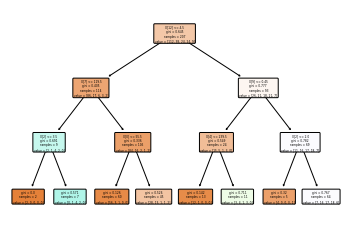

In [20]:
from sklearn.tree import plot_tree
plot_tree(dt_model, filled = True, rounded = True)

In [22]:
# In-sample score
dt_model.score(x_train, y_train)

0.6183574879227053

In [23]:
# Out-of-sample 
y_pred = dt_model.predict(x_test)

In [24]:
# confusion_matrix
from sklearn.metrics import confusion_matrix

In [25]:
# Out-of-Sample Confusion Matrix
cm_credit = confusion_matrix(y_test, y_pred)
cm_credit

array([[43,  2,  0,  3,  0],
       [ 8,  3,  1,  4,  0],
       [ 4,  0,  0,  7,  0],
       [ 3,  0,  1,  7,  0],
       [ 0,  0,  0,  4,  0]], dtype=int64)

c:\Users\Raphael\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


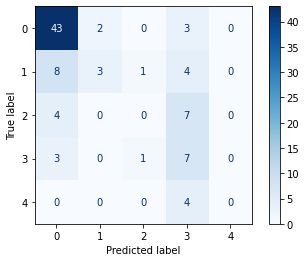

In [27]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(dt_model, x_test, y_test,cmap=plt.cm.Blues)

# Recall and Precision Scores for each scenario and classifier

In [ ]:
# True Positive Rate (=recall_score)
from sklearn.metrics import recall_score

In [ ]:
# Out-of-Sample TPR
recall_score(y_test, y_pred)